# **REPLY** - Image Classification

## **Overview**
This project is part of the coursework for Machine Learning, focusing on the application of machine learning techniques for the classification of scanned document images into predefined categories. Our objective is to develop a model capable of accurately identifying the type of document from a set of scanned images. This involves a comprehensive process starting from data analysis to model evaluation, aiming to achieve high accuracy and robustness in classification tasks.

## **Project Description**
The task involves constructing a machine learning model to classify scanned documents into four distinct categories: resumes, advertisements, emails, and handwritten documents. The dataset comprises 2000 images in TIFF format, requiring thorough preprocessing and analysis to ensure optimal model performance. Key stages of the project include data cleaning, model selection, hyperparameter tuning, and performance evaluation.

## **Dataset**
The dataset features 2000 scanned document images in .tif format, categorized into four classes:
* Resumes
* Advertisements
* Emails
* Handwritten documents

## This Project is held by Group 5
- Elisa Dobici elisa.dobici@studenti.luiss.it 785171
- Joshua Brauner joshua.brauner@studenti.luiss.it 778931
- Paoloemilio Grande paoloemilio.grande@studenti.luiss.it 788661

# EDA
The first step is to perform an in-depth analysis of the dataset to understand its structure, quality and composition. This step is fundamental in order to assess if any preprocessing is required before building the models.

In [2]:
#importing required libraries and modules
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os
import cv2
import imghdr
from PIL import Image
from skimage import io
from tqdm import tqdm
import random




C:\Users\Utente\AppData\Local\Temp\ipykernel_26400\115614627.py:9: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
#Setting directory
image_class_dir = "C:/Users/Utente/Desktop/Machine_Learning/Data_image_class_originali_copia/Data_Original"

#Counting number of images
print("In this directory there are:", len(os.listdir(image_class_dir))," images.")

In this directory there are: 2442  images.


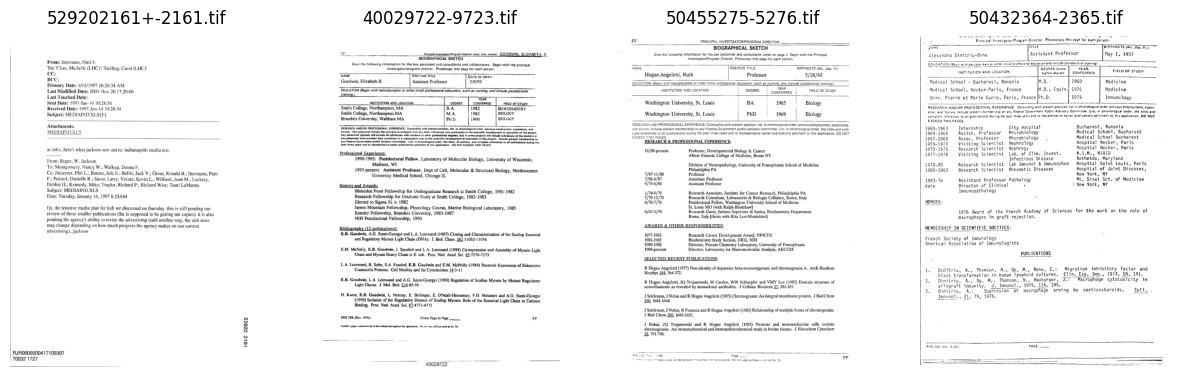

In [4]:
#First look at the images in the dataset

#creating a sample of 4 images from the image dataset
random_images = random.sample(os.listdir(image_class_dir), 4)

# Create a subplot for each image
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display each randomly selected image
for i, image in enumerate(random_images):
    image_path = os.path.join(image_class_dir, image)
    with Image.open(image_path) as img:
         axes[i].imshow(img, cmap='gray')
         axes[i].set_title(image)
         axes[i].axis('off')
#showing the plot
plt.show()

In [5]:
#cheching the format of the images and removing the ones that are not .tif

# Iterate over the images in the directory
for image in os.listdir(image_class_dir):
    image_path = os.path.join(image_class_dir, image)
    
    non_tif_img = 0
    # Check if the file extension is '.tif' (TIF format)
    if image.lower().endswith('.tif'):
        pass
    else:
        os.remove(image_path) # Remove the non-TIF file
        non_tif_img += 1
print(f"Number of non-tif images: {non_tif_img}")

Number of non-tif images: 0


The images are all in Tif format 

### IDENTIFYING CORRUPTED IMAGES

In [6]:
#check if an image is corrupted

# Initialize counter for corrupted images
num_corr_images = 0

# Check each image file in the directory
for image in os.listdir(image_class_dir):
    image_path = os.path.join(image_class_dir, image)
    img = Image.open(image_path)
    try:
        img.verify()
    except (IOError, SyntaxError):
        num_corr_images += 1

# Print the total number of corrupted images
print(f"Number of corrupted images: {num_corr_images}")

Number of corrupted images: 0


### ANALYZING IMAGE SIZE

In [7]:
#definig a function that counts the number of images for each size to see the prevalent one
def count_image_sizes(image_class_dir):
    size_counts = {}
    for image in tqdm(os.listdir(image_class_dir)):
        image_path = os.path.join(image_class_dir, image)
        with Image.open(image_path) as img:
            size = img.size
            if size in size_counts:
                size_counts[size] += 1
            else:
                size_counts[size] = 1
    return size_counts
size_counts = count_image_sizes(image_class_dir)

# Print the size_counts dictionary to see the prevalent size and its count
print("The size of the images are:", size_counts)


100%|██████████| 2442/2442 [00:02<00:00, 1093.49it/s]

The size of the images are: {(762, 1000): 37, (772, 1000): 14, (771, 1000): 75, (768, 1000): 5, (777, 1000): 44, (769, 1000): 6, (611, 1000): 1, (754, 1000): 1798, (793, 1000): 5, (780, 1000): 25, (782, 1000): 17, (786, 1000): 19, (808, 1000): 1, (776, 1000): 21, (794, 1000): 4, (845, 1000): 1, (764, 1000): 3, (765, 1000): 2, (791, 1000): 5, (796, 1000): 2, (773, 1000): 16, (805, 1000): 2, (790, 1000): 8, (774, 1000): 13, (867, 1000): 2, (865, 1000): 1, (799, 1000): 5, (844, 1000): 1, (798, 1000): 4, (813, 1000): 1, (788, 1000): 20, (787, 1000): 20, (850, 1000): 1, (648, 1000): 1, (779, 1000): 19, (778, 1000): 24, (795, 1000): 2, (757, 1000): 30, (843, 1000): 1, (841, 1000): 1, (802, 1000): 23, (809, 1000): 2, (725, 1000): 1, (784, 1000): 17, (789, 1000): 12, (801, 1000): 3, (785, 1000): 24, (742, 1000): 3, (741, 1000): 1, (797, 1000): 4, (767, 1000): 3, (781, 1000): 28, (775, 1000): 12, (783, 1000): 18, (748, 1000): 1, (1473, 1000): 1, (758, 1000): 1, (770, 1000): 4, (761, 1000): 4, (

In [8]:
# create an empty list to store the other sizes different from the prevalent one
other_sizes = []

# check the prevalent size from the previous code
prevalent_size = (754, 1000)
prevalent_size_num = size_counts[prevalent_size]
# Iterate over the size_counts dictionary to append the other sizes in the created list
for size, count in size_counts.items():
    if size != prevalent_size:
        other_sizes.append(size)

# Sum up counts of all other sizes
number_other_sizes = sum(count for size, count in size_counts.items() if size != prevalent_size)
# Print the lists
print("Number of the prevalent size and respective size:", prevalent_size_num, prevalent_size)
print("Number of the other sizes and respective sizes:", number_other_sizes, other_sizes)


Number of the prevalent size and respective size: 1798 (754, 1000)
Number of the other sizes and respective sizes: 644 [(762, 1000), (772, 1000), (771, 1000), (768, 1000), (777, 1000), (769, 1000), (611, 1000), (793, 1000), (780, 1000), (782, 1000), (786, 1000), (808, 1000), (776, 1000), (794, 1000), (845, 1000), (764, 1000), (765, 1000), (791, 1000), (796, 1000), (773, 1000), (805, 1000), (790, 1000), (774, 1000), (867, 1000), (865, 1000), (799, 1000), (844, 1000), (798, 1000), (813, 1000), (788, 1000), (787, 1000), (850, 1000), (648, 1000), (779, 1000), (778, 1000), (795, 1000), (757, 1000), (843, 1000), (841, 1000), (802, 1000), (809, 1000), (725, 1000), (784, 1000), (789, 1000), (801, 1000), (785, 1000), (742, 1000), (741, 1000), (797, 1000), (767, 1000), (781, 1000), (775, 1000), (783, 1000), (748, 1000), (1473, 1000), (758, 1000), (770, 1000), (761, 1000), (800, 1000), (792, 1000), (740, 1000), (606, 1000), (804, 1000), (763, 1000), (807, 1000), (811, 1000), (738, 1000), (730, 10

In [9]:
#plotting the size distribution with an interactive plot 

#define the data, trace and layout
sizes = [str(prevalent_size), 'Other Sizes']
counts = [prevalent_size_num, number_other_sizes]

# Create the trace
trace = go.Bar(
    x=sizes,
    y=counts,
    marker_color=['blue', 'lightblue']
)

# Create the layout
layout = go.Layout(
    title='Distribution of Image Sizes',
    xaxis=dict(title='Size of the Images'),
    yaxis=dict(title='Count')
)

# Create the figure
fig = go.Figure(trace, layout=layout)

# Show the plot
fig.show()


The prevalent image size is (754, 1000). This will be useful when dealing with the image resizing issue.

### DETERMINE THE IMAGES COLOR CHANNELS (RGB, GREYSCALE)


The mode "L" stands for "Luminance" or "Lightness", as it captures the brightness of each pixel without any color information. We can see from the results that all the images are in greyscale mode. 

In [10]:
#checking whether the image is grayscale or RGB

#define the function
def check_image_colors(image_class_dir):
    color_modes = {'L': 0, 'RGB': 0, 'Other': 0}
    for image in os.listdir(image_class_dir):
           image_path = os.path.join(image_class_dir, image)
           with Image.open(image_path) as img:
                if img.mode in color_modes:
                    color_modes[img.mode] += 1
                else:
                    color_modes['Other'] += 1
    return color_modes
check_image_colors(image_class_dir)


{'L': 2442, 'RGB': 0, 'Other': 0}

### Analysing the grey scale distribution for the images

First, the histogram is a fundamental image analysis tool that describes the distribution of the pixel intensities in an image and to determine whether an image contains distinct regions of certain grayscale values.  Indeed, the greyscale distribution histogram displays the frequency or count of pixel brightness values in an image. Each bar in the histogram represents a range of pixel brightness values, and the height of the bar indicates the number of pixels in the image that have brightness values within that range. 

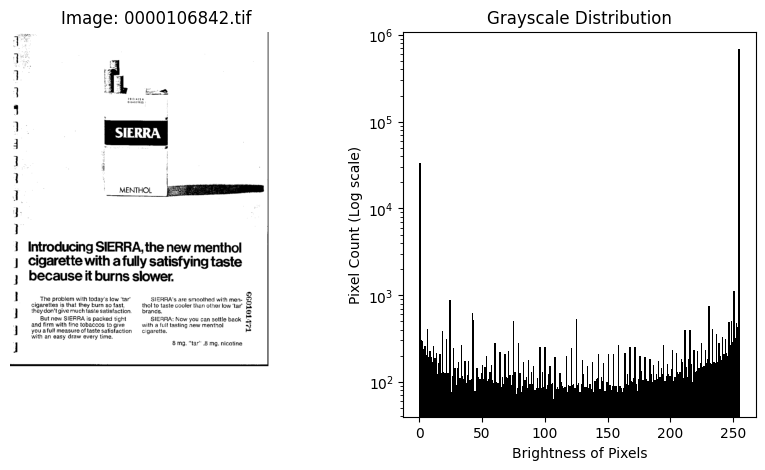

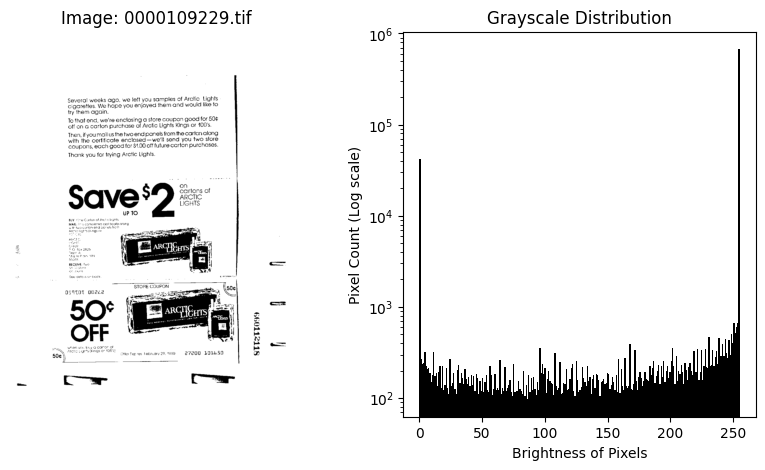

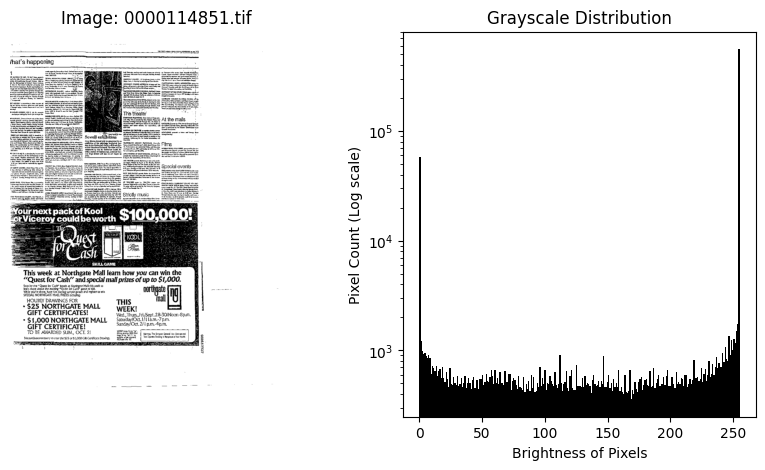

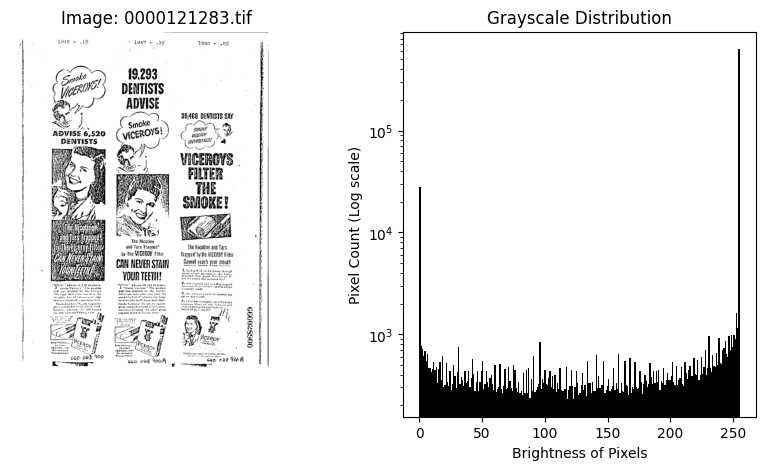

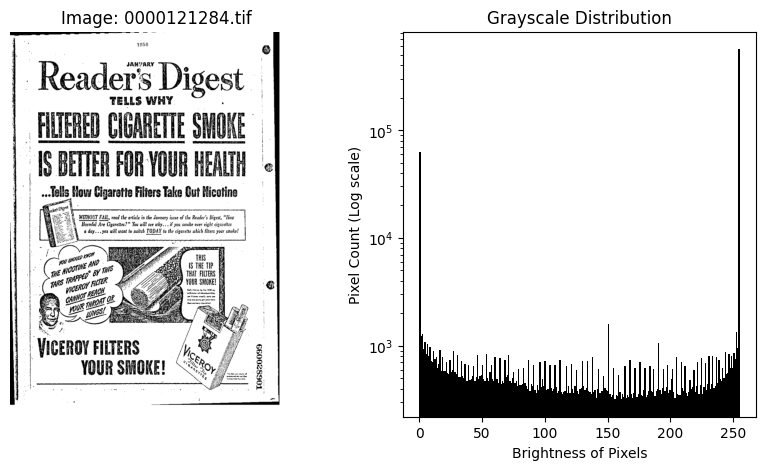

In [18]:
#visualize the grey scale for some images and compare it with the original image
# Get the list of images we want to visualize from the directory
img_to_visualize = os.listdir(image_class_dir)[:5]

# Iterate over the list
for image in img_to_visualize:
    image_path = os.path.join(image_class_dir, image)
    with Image.open(image_path) as img:
        # Display the image and its grayscale histogram side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        # Display the image
        axes[0].imshow(img, cmap='gray')
        axes[0].set_title(f'Image: {image}')
        axes[0].axis('off')
        
        # Display the grayscale histogram
        axes[1].hist(img.getdata(), bins=256, color='black')
        axes[1].set_title('Grayscale Distribution')
        axes[1].set_xlabel('Brightness of Pixels')
        axes[1].set_ylabel('Pixel Count (Log scale)') 
        axes[1].set_yscale('log')
        
        plt.show()


100%|██████████| 2442/2442 [00:09<00:00, 268.43it/s]


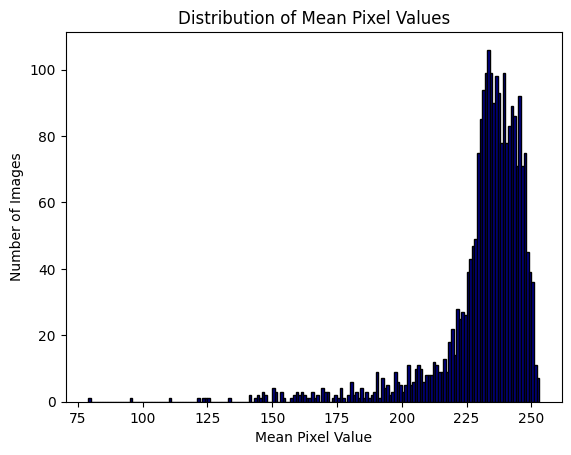

In [12]:
#checking the mean pixel value of the images

pixel_mean_values = []
for image in tqdm(os.listdir(image_class_dir)):
    image_path = os.path.join(image_class_dir, image)
    with Image.open(image_path) as img:
        pixel_mean_value = np.mean(np.array(img))
        pixel_mean_values.append(pixel_mean_value)

pixel_mean_int = [int(x) for x in pixel_mean_values]

# Plot the histogram
plt.hist(pixel_mean_values, bins= range(min(pixel_mean_int), max(pixel_mean_int) + 1), color = 'darkblue', edgecolor='black')
plt.xlabel('Mean Pixel Value')
plt.ylabel('Number of Images')
plt.title('Distribution of Mean Pixel Values')
plt.show()

The mean pixel value distribution on the other hand calculates the mean pixel value of each image in the specified directory and then plots a histogram to visualize the distribution. The mean can be useful to give insights into the general brightness of the whole image dataset. Also in this case, considering the (0,255) range, a bright image will have a higher mean, while a darker image will display a lower mean. From the below provided diagram, we can understand that the maximum images’ mean pixel value is concentrated between 210 and 250, so we can expect a concentration of lighter images on average 

## IMAGES LABELLING

After conducting exploratory data analysis, we proceeded by manually labeling all the images in the provided dataset to build supervised machine learning models for achieving the project objectives. We divided the images into five different classes: the four main classes required by the company and an additional class named 'other' to store all the images that we deemed were not part of resumes, handwritten documents, advertisements, or emails. Now, let's analyze the number of images in each subdirectory created for each class.

In [13]:
#setting the directory of the labelled images
label_dir = "C:/Users/Utente/Desktop/Project_ML_Reply/Immagini_labels/LABELLED_IMAGES"

classes = os.listdir(label_dir)  # Get the list of files and subdirectories in the specified labels_dir
#creating a list that stores he number of files in each subdirectory
label_imgs = [len(os.listdir(os.path.join(label_dir, cls))) for cls in classes]  # Count files in each subdirectory

# Print the classes and the number of files in each subdirectory
print(classes)
print(label_imgs)

['Advertisements', 'E-mail', 'Handwritten Documents', 'Other', 'Resumé']
[376, 353, 523, 283, 907]


Let's now plot the distribution of the classes to check for class imbalance

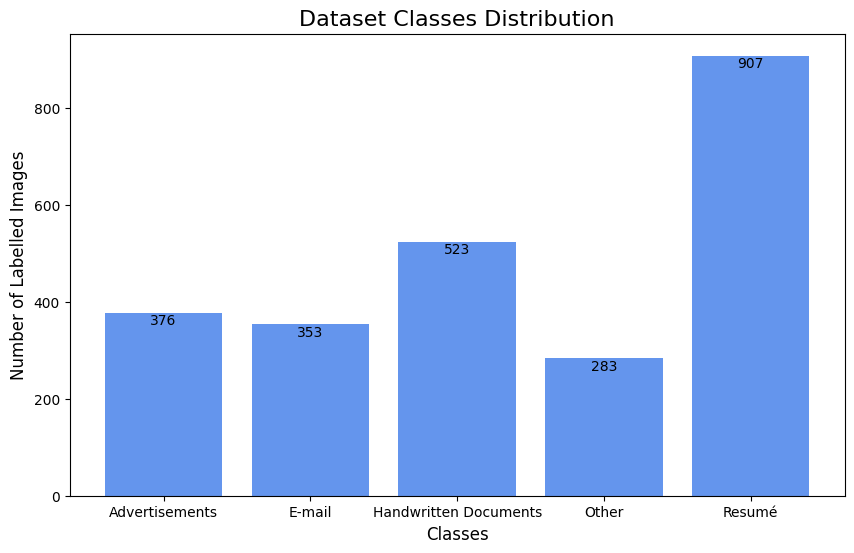

In [14]:
#plotting the class distribution
plt.figure(figsize=(10, 6))
plt.bar(classes, label_imgs, color='cornflowerblue')

# Setting title and labels
plt.title('Dataset Classes Distribution', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Labelled Images', fontsize=12)

# Adding values on top of each bar.Annotating each bar with its height
for i, value in enumerate(label_imgs):
    plt.text(i, value - 30, str(value), ha='center', va='bottom')

plt.show()

As we can see from the above graph, there is a class imbalance insofar as the resumè class is the prevailing one followed by handwritten documents.



After conducting initial image analysis to comprehend fundamental information and image composition, followed by labelling, we embarked on identifying the most suitable models for maximizing performance while accommodating the limited computational resources of our machines. Consequently, we opted to experiment with various models, commencing with an unsupervised approach utilizing feature extraction via Local Binary Patterns. Subsequently, we explored supervised techniques such as convolutional neural networks (CNNs) and pretrained models like VGG16, capitalizing on the advantages of transfer learning. This systematic approach allows for a comprehensive evaluation of model effectiveness while mitigating computational constraints. 